In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('result.csv')
dataset

,Name_Evr,Name_Fun,Time,Epoch,Best_Fit,Std,Optimum,Parameters
0,IWO,easom_function,0.052080,10,-0.999998,2.459221e-06,-1.000000,NO
1,IWO,ackley_function,0.034397,10,0.004035,4.034708e-03,0.000000,NO
2,IWO,ackley_function_3,0.032113,10,-184.742680,1.088635e+01,-195.629028,NO
3,IWO,keane_function,0.033521,10,-0.287661,3.860065e-01,-0.673668,NO
4,IWO,michaelwicz_function,0.030911,10,-1.801282,1.787696e-05,-1.801300,NO
...,...,...,...,...,...,...,...,...
27995,ACO,composite_xin_she_yang_4_schwefel_function,1.915298,1000,249.139148,0.000000e+00,249.139148,NO
27996,ACO,composite_cross_in_tray_drop_wave_function,1.826325,1000,-1.268712,1.114508e-09,-1.268712,NO
27997,ACO,composite_schaffer_drop_wave_function,1.794421,1000,-0.800000,0.000000e+00,-0.800000,NO
27998,ACO,composite_shubert_function,2.123846,1000,-92.370628,1.762651e-01,-92.546893,NO


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name_Evr    28000 non-null  object 
 1   Name_Fun    28000 non-null  object 
 2   Time        28000 non-null  float64
 3   Epoch       28000 non-null  int64  
 4   Best_Fit    28000 non-null  float64
 5   Std         28000 non-null  float64
 6   Optimum     28000 non-null  float64
 7   Parameters  28000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.7+ MB


In [4]:
print('Heuristics:', pd.unique(dataset['Name_Evr']), '\n')
print('Functions:', pd.unique(dataset['Name_Fun']))

Heuristics: ['IWO' 'HHO' 'ABC' 'BBO' 'CA' 'GA' 'ACO'] 

Functions: ['easom_function' 'ackley_function' 'ackley_function_3' 'keane_function'
 'michaelwicz_function' 'rosenbrook_function'
 'nonsmooth_multipeak_function' 'brown_function' 'levin_function_13'
 'bird_function' 'schwefel_function' 'brent_function'
 'deckkers_aarts_function' 'xin_she_yang_function_4' 'eggholder_function'
 'shubert_function' 'schaffer_function' 'shubert_function_4'
 'drop_wave_function' 'cross_in_tray_function'
 'composite_xin_she_yang_4_schwefel_function'
 'composite_cross_in_tray_drop_wave_function'
 'composite_schaffer_drop_wave_function' 'composite_shubert_function'
 'composite_shubert_4_levin_function_13']


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name_Evr    28000 non-null  object 
 1   Name_Fun    28000 non-null  object 
 2   Time        28000 non-null  float64
 3   Epoch       28000 non-null  int64  
 4   Best_Fit    28000 non-null  float64
 5   Std         28000 non-null  float64
 6   Optimum     28000 non-null  float64
 7   Parameters  28000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.7+ MB


In [6]:
IWO = dataset[(dataset['Name_Evr'] == 'IWO')]
HHO = dataset[(dataset['Name_Evr'] == 'HHO')]
ABC = dataset[(dataset['Name_Evr'] == 'ABC')]
ACO = dataset[(dataset['Name_Evr'] == 'ACO')]
BBO = dataset[(dataset['Name_Evr'] == 'BBO')]
CA = dataset[(dataset['Name_Evr'] == 'CA')]
GA = dataset[(dataset['Name_Evr'] == 'GA')]

In [7]:
IWO_TE = IWO[['Time', 'Epoch']].groupby(['Epoch']).mean()
ACO_TE = ACO[['Time', 'Epoch']].groupby(['Epoch']).mean()
HHO_TE = HHO[['Time', 'Epoch']].groupby(['Epoch']).mean()
ABC_TE = ABC[['Time', 'Epoch']].groupby(['Epoch']).mean()
BBO_TE = BBO[['Time', 'Epoch']].groupby(['Epoch']).mean()
CA_TE = CA[['Time', 'Epoch']].groupby(['Epoch']).mean()
GA_TE = GA[['Time', 'Epoch']].groupby(['Epoch']).mean()

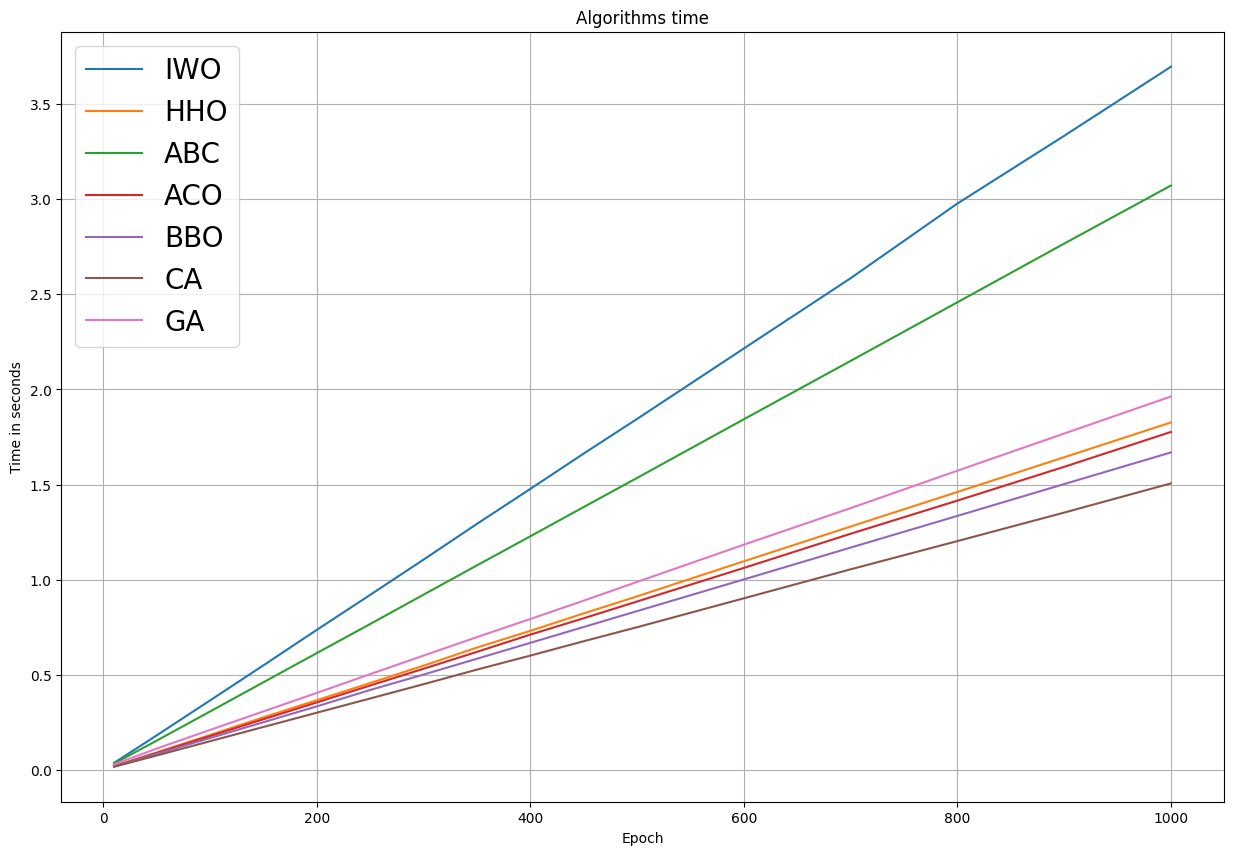

In [8]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(IWO_TE['Time'], label = 'IWO')
plt.plot(HHO_TE['Time'], label = 'HHO')
plt.plot(ABC_TE['Time'], label = 'ABC')
plt.plot(ACO_TE['Time'], label = 'ACO')
plt.plot(BBO_TE['Time'], label = 'BBO')
plt.plot(CA_TE['Time'], label = 'CA')
plt.plot(GA_TE['Time'], label = 'GA')

plt.ylabel('Time in seconds')
plt.xlabel('Epoch')
plt.title('Algorithms time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

In [9]:
IWO_ES = IWO[['Epoch', 'Std']].groupby(['Epoch']).mean()
HHO_ES = HHO[['Epoch', 'Std']].groupby(['Epoch']).mean()
ABC_ES = ABC[['Epoch', 'Std']].groupby(['Epoch']).mean()
ACO_ES = ACO[['Epoch', 'Std']].groupby(['Epoch']).mean()
BBO_ES = BBO[['Epoch', 'Std']].groupby(['Epoch']).mean()
CA_ES = CA[['Epoch', 'Std']].groupby(['Epoch']).mean()
GA_ES = GA[['Epoch', 'Std']].groupby(['Epoch']).mean()

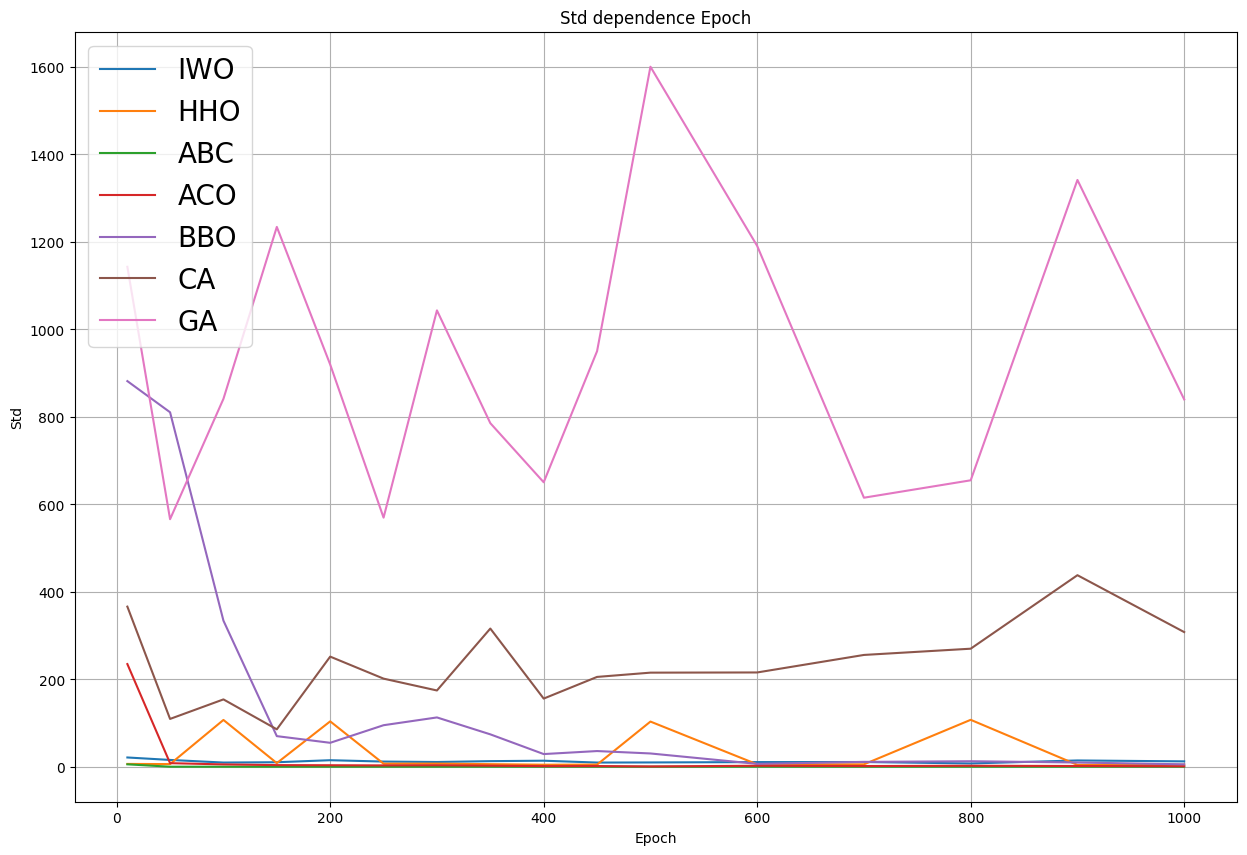

In [10]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(IWO_ES['Std'], label = 'IWO')
plt.plot(HHO_ES['Std'], label = 'HHO')
plt.plot(ABC_ES['Std'], label = 'ABC')
plt.plot(ACO_ES['Std'], label = 'ACO')
plt.plot(BBO_ES['Std'], label = 'BBO')
plt.plot(CA_ES['Std'], label = 'CA')
plt.plot(GA_ES['Std'], label = 'GA')

plt.ylabel('Std')
plt.xlabel('Epoch')
plt.title('Std dependence Epoch')
plt.legend(loc=2, prop={'size': 20})
plt.show()

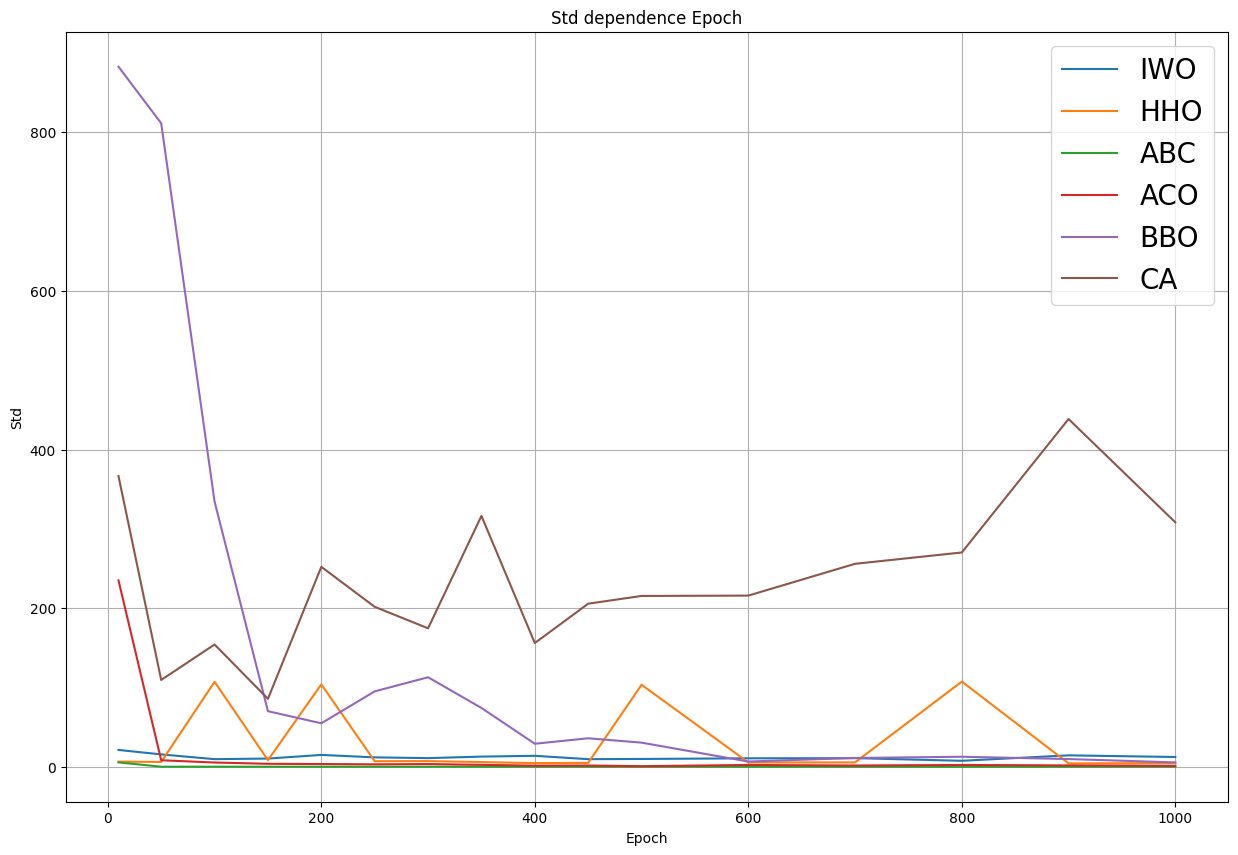

In [11]:
# No GA
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(IWO_ES['Std'], label = 'IWO')
plt.plot(HHO_ES['Std'], label = 'HHO')
plt.plot(ABC_ES['Std'], label = 'ABC')
plt.plot(ACO_ES['Std'], label = 'ACO')
plt.plot(BBO_ES['Std'], label = 'BBO')
plt.plot(CA_ES['Std'], label = 'CA')

plt.ylabel('Std')
plt.xlabel('Epoch')
plt.title('Std dependence Epoch')
plt.legend(loc=1, prop={'size': 20})
plt.show()

In [12]:
dataset[dataset['Epoch'] == 200][['Name_Evr', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr']).mean()

,Time,Best_Fit,Std,Optimum
Name_Evr,,,,
ABC,0.614311,-1044.358468,0.587104,-1044.509675
ACO,0.354698,-1040.903919,3.979241,-1044.509675
BBO,0.333991,-989.286466,55.262188,-1044.509675
CA,0.300612,-792.296128,252.257017,-1044.509675
GA,0.404779,-124.617843,919.891919,-1044.509675
HHO,0.366384,-940.628866,104.273302,-1044.509675
IWO,0.736439,-1029.486118,15.459437,-1044.509675


# Evr

In [13]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'ACO')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit  \
Name_Evr Name_Fun                                                             
ACO      ackley_function                             0.351150  7.570122e-12   
         ackley_function_3                           0.351772 -1.864108e+02   
         bird_function                               0.352268 -1.066927e+02   
         brent_function                              0.344856  4.403706e-26   
         brown_function                              0.342895  2.083719e-04   
         composite_cross_in_tray_drop_wave_function  0.357623 -1.268373e+00   
         composite_schaffer_drop_wave_function       0.350207 -7.961879e-01   
         composite_shubert_4_levin_function_13       0.379866 -1.293912e+01   
         composite_shubert_function                  0.391024 -9.087399e+01   
         composite_xin_she_yang_4_schwefel_function  0.373605  2.491391e+02   
         cross_in_tray_function                      0.353914 -2.062606e+00   
         deckkers_aarts_function                     0.343614 -2.477574e+04   
         drop_wave_function                          0.346517 -9.951860e-01   
         easom_function                              0.347620 -1.000000e+00   
         eggholder_function                          0.351932 -9.537899e+02   
         keane_function                              0.348110 -6.735290e-01   
         levin_function_13                           0.353746  1.848272e-23   
         michaelwicz_function                        0.348381 -1.801303e+00   
         nonsmooth_multipeak_function                0.343121  0.000000e+00   
         rosenbrook_function                         0.341685  1.674881e-04   
         schaffer_function                           0.345655  0.000000e+00   
         schwefel_function                           0.350349  7.312821e+01   
         shubert_function                            0.366107 -1.830250e+02   
         shubert_function_4                          0.365397 -2.479565e+01   
         xin_she_yang_function_4                     0.366022 -2.000000e+00   

                                                              Std  \
Name_Evr Name_Fun                                                   
ACO      ackley_function                             7.570122e-12   
         ackley_function_3                           9.218230e+00   
         bird_function                               1.136111e-01   
         brent_function                              4.403706e-26   
         brown_function                              2.083719e-04   
         composite_cross_in_tray_drop_wave_function  3.391522e-04   
         composite_schaffer_drop_wave_function       3.812098e-03   
         composite_shubert_4_levin_function_13       1.889494e-01   
         composite_shubert_function                  1.672906e+00   
         composite_xin_she_yang_4_schwefel_function  0.000000e+00   
         cross_in_tray_function                      6.969334e-06   
         deckkers_aarts_function                     4.647673e+00   
         drop_wave_function                          4.813978e-03   
         easom_function                              2.987610e-14   
         eggholder_function                          5.850802e+00   
         keane_function                              1.385178e-04   
         levin_function_13                           1.848272e-23   
         michaelwicz_function                        3.410099e-06   
         nonsmooth_multipeak_function                0.000000e+00   
         rosenbrook_function                         1.674881e-04   
         schaffer_function                           0.000000e+00   
         schwefel_function                           7.312821e+01   
         shubert_function                            3.705943e+00   
         shubert_function_4                          9.452077e-01   
         xin_she_yang_function_4                     9.076237e-08   

                                                          O

In [14]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'IWO')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit  \
Name_Evr Name_Fun                                                             
IWO      ackley_function                             0.683400  3.495831e-04   
         ackley_function_3                           0.676177 -1.864112e+02   
         bird_function                               0.683282 -1.067877e+02   
         brent_function                              0.632454  1.809604e-08   
         brown_function                              0.636799  1.112818e-03   
         composite_cross_in_tray_drop_wave_function  0.779754 -1.268687e+00   
         composite_schaffer_drop_wave_function       0.721089 -7.988155e-01   
         composite_shubert_4_levin_function_13       1.016805 -1.312720e+01   
         composite_shubert_function                  1.146194 -9.254686e+01   
         composite_xin_she_yang_4_schwefel_function  0.950982  2.491391e+02   
         cross_in_tray_function                      0.735620 -2.062612e+00   
         deckkers_aarts_function                     0.623155 -2.477652e+04   
         drop_wave_function                          0.668496 -9.987634e-01   
         easom_function                              0.630066 -9.000000e-01   
         eggholder_function                          0.709885 -7.166520e+02   
         keane_function                              0.664247 -6.736675e-01   
         levin_function_13                           0.723766  2.391859e-07   
         michaelwicz_function                        0.660777 -1.801303e+00   
         nonsmooth_multipeak_function                0.625353  0.000000e+00   
         rosenbrook_function                         0.597979  2.501364e-07   
         schaffer_function                           0.659782  1.767733e-04   
         schwefel_function                           0.651785  1.283258e+02   
         shubert_function                            0.854642 -1.867309e+02   
         shubert_function_4                          0.849852 -2.574177e+01   
         xin_she_yang_function_4                     0.828634 -1.599891e+00   

                                                              Std  \
Name_Evr Name_Fun                                                   
IWO      ackley_function                             3.495831e-04   
         ackley_function_3                           9.217823e+00   
         bird_function                               2.319450e-02   
         brent_function                              1.809604e-08   
         brown_function                              1.112818e-03   
         composite_cross_in_tray_drop_wave_function  2.485686e-05   
         composite_schaffer_drop_wave_function       1.184486e-03   
         composite_shubert_4_levin_function_13       8.628122e-04   
         composite_shubert_function                  3.046482e-05   
         composite_xin_she_yang_4_schwefel_function  9.401313e-09   
         cross_in_tray_function                      1.869319e-06   
         deckkers_aarts_function                     5.424388e+00   
         drop_wave_function                          1.236625e-03   
         easom_function                              1.000000e-01   
         eggholder_function                          2.429887e+02   
         keane_function                              3.051886e-08   
         levin_function_13                           2.391859e-07   
         michaelwicz_function                        3.081293e-06   
         nonsmooth_multipeak_function                0.000000e+00   
         rosenbrook_function                         2.501364e-07   
         schaffer_function                           1.767733e-04   
         schwefel_function                           1.283258e+02   
         shubert_function                            2.552324e-05   
         shubert_function_4                          9.102803e-04   
         xin_she_yang_function_4                     4.001088e-01   

                                                          O

In [15]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'HHO')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit  \
Name_Evr Name_Fun                                                             
HHO      ackley_function                             0.352721  0.000000e+00   
         ackley_function_3                           0.357072 -1.864112e+02   
         bird_function                               0.348994 -1.067877e+02   
         brent_function                              0.331292  1.759602e-26   
         brown_function                              0.315856  4.039452e-81   
         composite_cross_in_tray_drop_wave_function  0.378665 -1.268712e+00   
         composite_schaffer_drop_wave_function       0.348485 -8.000000e-01   
         composite_shubert_4_levin_function_13       0.461841 -1.230972e+01   
         composite_shubert_function                  0.500577 -9.254689e+01   
         composite_xin_she_yang_4_schwefel_function  0.435541  2.492018e+02   
         cross_in_tray_function                      0.360715 -2.062612e+00   
         deckkers_aarts_function                     0.332212 -2.229887e+04   
         drop_wave_function                          0.337875 -1.000000e+00   
         easom_function                              0.342710 -1.000000e+00   
         eggholder_function                          0.358381 -8.810495e+02   
         keane_function                              0.345099 -6.736675e-01   
         levin_function_13                           0.363192  3.249285e-31   
         michaelwicz_function                        0.344232 -1.641043e+00   
         nonsmooth_multipeak_function                0.326642  0.000000e+00   
         rosenbrook_function                         0.322514  1.213756e-26   
         schaffer_function                           0.332208  0.000000e+00   
         schwefel_function                           0.344291  3.553153e+01   
         shubert_function                            0.409441 -1.867309e+02   
         shubert_function_4                          0.407277 -2.530646e+01   
         xin_she_yang_function_4                     0.401766 -2.000000e+00   

                                                              Std  \
Name_Evr Name_Fun                                                   
HHO      ackley_function                             0.000000e+00   
         ackley_function_3                           9.217816e+00   
         bird_function                               2.319669e-02   
         brent_function                              1.759602e-26   
         brown_function                              4.039452e-81   
         composite_cross_in_tray_drop_wave_function  7.973486e-08   
         composite_schaffer_drop_wave_function       0.000000e+00   
         composite_shubert_4_levin_function_13       8.183501e-01   
         composite_shubert_function                  6.622500e-10   
         composite_xin_she_yang_4_schwefel_function  6.264789e-02   
         cross_in_tray_function                      1.870823e-06   
         deckkers_aarts_function                     2.481992e+03   
         drop_wave_function                          0.000000e+00   
         easom_function                              8.881784e-17   
         eggholder_function                          7.859119e+01   
         keane_function                              2.109424e-16   
         levin_function_13                           3.249285e-31   
         michaelwicz_function                        1.602627e-01   
         nonsmooth_multipeak_function                0.000000e+00   
         rosenbrook_function                         1.213756e-26   
         schaffer_function                           0.000000e+00   
         schwefel_function                           3.553153e+01   
         shubert_function                            8.829352e-06   
         shubert_function_4                          4.360326e-01   
         xin_she_yang_function_4                     0.000000e+00   

                                                          O

In [16]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'ABC')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit  \
Name_Evr Name_Fun                                                             
ABC      ackley_function                             0.599857  0.000000e+00   
         ackley_function_3                           0.602060 -1.864112e+02   
         bird_function                               0.594278 -1.067877e+02   
         brent_function                              0.574623  1.383897e-87   
         brown_function                              0.568128  5.800551e-34   
         composite_cross_in_tray_drop_wave_function  0.626888 -1.268711e+00   
         composite_schaffer_drop_wave_function       0.597025 -8.000000e-01   
         composite_shubert_4_levin_function_13       0.714293 -1.312807e+01   
         composite_shubert_function                  0.762587 -9.253817e+01   
         composite_xin_she_yang_4_schwefel_function  0.688083  2.491391e+02   
         cross_in_tray_function                      0.607765 -2.062612e+00   
         deckkers_aarts_function                     0.571588 -2.477652e+04   
         drop_wave_function                          0.584343 -9.999998e-01   
         easom_function                              0.592587 -9.996888e-01   
         eggholder_function                          0.605448 -9.596407e+02   
         keane_function                              0.588802 -6.736675e-01   
         levin_function_13                           0.610513  1.349784e-31   
         michaelwicz_function                        0.587879 -1.801303e+00   
         nonsmooth_multipeak_function                0.575697  0.000000e+00   
         rosenbrook_function                         0.563066  7.212764e-31   
         schaffer_function                           0.579628  0.000000e+00   
         schwefel_function                           0.587071  2.545513e-05   
         shubert_function                            0.661293 -1.867289e+02   
         shubert_function_4                          0.657025 -2.574177e+01   
         xin_she_yang_function_4                     0.657259 -2.000000e+00   

                                                              Std  \
Name_Evr Name_Fun                                                   
ABC      ackley_function                             0.000000e+00   
         ackley_function_3                           9.217816e+00   
         bird_function                               2.319669e-02   
         brent_function                              1.383897e-87   
         brown_function                              5.800551e-34   
         composite_cross_in_tray_drop_wave_function  1.232130e-06   
         composite_schaffer_drop_wave_function       8.014345e-12   
         composite_shubert_4_levin_function_13       1.598721e-15   
         composite_shubert_function                  8.725212e-03   
         composite_xin_she_yang_4_schwefel_function  0.000000e+00   
         cross_in_tray_function                      1.870823e-06   
         deckkers_aarts_function                     5.424592e+00   
         drop_wave_function                          1.621840e-07   
         easom_function                              3.111926e-04   
         eggholder_function                          3.727915e-05   
         keane_function                              1.221245e-16   
         levin_function_13                           1.349784e-31   
         michaelwicz_function                        3.410099e-06   
         nonsmooth_multipeak_function                0.000000e+00   
         rosenbrook_function                         7.212764e-31   
         schaffer_function                           0.000000e+00   
         schwefel_function                           2.545513e-05   
         shubert_function                            1.980395e-03   
         shubert_function_4                          9.128822e-04   
         xin_she_yang_function_4                     0.000000e+00   

                                                          O

In [17]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'BBO')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit  \
Name_Evr Name_Fun                                                             
BBO      ackley_function                             0.324504      3.078354   
         ackley_function_3                           0.328448   -171.180493   
         bird_function                               0.320906   -105.886997   
         brent_function                              0.315080      0.025767   
         brown_function                              0.311526      0.003860   
         composite_cross_in_tray_drop_wave_function  0.336774     -1.247734   
         composite_schaffer_drop_wave_function       0.321845     -0.732155   
         composite_shubert_4_levin_function_13       0.388327    -11.470716   
         composite_shubert_function                  0.407810    -88.087754   
         composite_xin_she_yang_4_schwefel_function  0.372192    249.150647   
         cross_in_tray_function                      0.332681     -2.062123   
         deckkers_aarts_function                     0.313478 -23523.665235   
         drop_wave_function                          0.319489     -0.929271   
         easom_function                              0.320987     -0.045139   
         eggholder_function                          0.331457   -872.273014   
         keane_function                              0.324643     -0.659755   
         levin_function_13                           0.333399      0.145628   
         michaelwicz_function                        0.320733     -1.794328   
         nonsmooth_multipeak_function                0.313408      0.023802   
         rosenbrook_function                         0.309131      0.323722   
         schaffer_function                           0.318034      0.004698   
         schwefel_function                           0.314631      3.593950   
         shubert_function                            0.357181   -182.144777   
         shubert_function_4                          0.355798    -25.020124   
         xin_she_yang_function_4                     0.357307     -1.312469   

                                                             Std       Optimum  
Name_Evr Name_Fun                                                               
BBO      ackley_function                                3.078354      0.000000  
         ackley_function_3                             24.448535   -195.629028  
         bird_function                                  0.877540   -106.764537  
         brent_function                                 0.025767      0.000000  
         brown_function                                 0.003860      0.000000  
         composite_cross_in_tray_drop_wave_function     0.020978     -1.268712  
         composite_schaffer_drop_wave_function          0.067845     -0.800000  
         composite_shubert_4_levin_function_13          1.657350    -13.128066  
         composite_shubert_function                     4.459139    -92.546893  
         composite_xin_she_yang_4_schwefel_function     0.011499    249.139148  
         cross_in_tray_function                         0.000487     -2.062610  
         deckkers_aarts_function                     1248.403001 -24771.093750  
         drop_wave_function                             0.070729     -1.000000  
         easom_function                                 0.954861     -1.000000  
         eggholder_function                            87.367686   -959.640700  
         keane_function                                 0.013912     -0.673668  
         levin_function_13                              0.145628      0.000000  
         michaelwicz_function                           0.006972     -1.801300  
         nonsmooth_multipeak_function                   0.023802      0.000000  
         rosenbrook_function                            0.323722      0.000000  
         schaffer_function                              0.004698      0.000000  
         schwefel_function                              3.59

In [18]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'CA')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit  \
Name_Evr Name_Fun                                                             
CA       ackley_function                             0.301840      3.202007   
         ackley_function_3                           0.295882   -178.736542   
         bird_function                               0.296212    -98.541471   
         brent_function                              0.280106      0.221821   
         brown_function                              0.276009      0.006636   
         composite_cross_in_tray_drop_wave_function  0.312281     -1.264682   
         composite_schaffer_drop_wave_function       0.297585     -0.781442   
         composite_shubert_4_levin_function_13       0.349840     -9.841167   
         composite_shubert_function                  0.370637    -83.660434   
         composite_xin_she_yang_4_schwefel_function  0.335835    249.184838   
         cross_in_tray_function                      0.298415     -2.059480   
         deckkers_aarts_function                     0.278177 -18783.170417   
         drop_wave_function                          0.283625     -0.917019   
         easom_function                              0.285134     -0.463362   
         eggholder_function                          0.295759   -828.996917   
         keane_function                              0.288988     -0.612253   
         levin_function_13                           0.297220      0.339510   
         michaelwicz_function                        0.290383     -1.717888   
         nonsmooth_multipeak_function                0.277433      0.284546   
         rosenbrook_function                         0.273858      0.098717   
         schaffer_function                           0.281086      0.001847   
         schwefel_function                           0.288328    118.052042   
         shubert_function                            0.321390   -164.028621   
         shubert_function_4                          0.320203    -22.833835   
         xin_she_yang_function_4                     0.319065     -1.169639   

                                                             Std       Optimum  
Name_Evr Name_Fun                                                               
CA       ackley_function                                3.202007      0.000000  
         ackley_function_3                             16.892486   -195.629028  
         bird_function                                  8.228836   -106.764537  
         brent_function                                 0.221821      0.000000  
         brown_function                                 0.006636      0.000000  
         composite_cross_in_tray_drop_wave_function     0.004031     -1.268712  
         composite_schaffer_drop_wave_function          0.018558     -0.800000  
         composite_shubert_4_levin_function_13          3.286899    -13.128066  
         composite_shubert_function                     8.886459    -92.546893  
         composite_xin_she_yang_4_schwefel_function     0.045691    249.139148  
         cross_in_tray_function                         0.003131     -2.062610  
         deckkers_aarts_function                     5989.004307 -24771.093750  
         drop_wave_function                             0.082981     -1.000000  
         easom_function                                 0.536638     -1.000000  
         eggholder_function                           130.643783   -959.640700  
         keane_function                                 0.061414     -0.673668  
         levin_function_13                              0.339510      0.000000  
         michaelwicz_function                           0.083414     -1.801300  
         nonsmooth_multipeak_function                   0.284546      0.000000  
         rosenbrook_function                            0.098717      0.000000  
         schaffer_function                              0.001847      0.000000  
         schwefel_function                            118.05

In [19]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'GA')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit  \
Name_Evr Name_Fun                                                             
GA       ackley_function                             0.389342  4.395453e+00   
         ackley_function_3                           0.390997 -1.419821e+02   
         bird_function                               0.399334 -1.022703e+02   
         brent_function                              0.383095  1.030441e-01   
         brown_function                              0.384648  1.659734e-02   
         composite_cross_in_tray_drop_wave_function  0.408493 -1.225005e+00   
         composite_schaffer_drop_wave_function       0.399800 -7.006174e-01   
         composite_shubert_4_levin_function_13       0.449764 -7.732738e+00   
         composite_shubert_function                  0.481080 -6.918047e+01   
         composite_xin_she_yang_4_schwefel_function  0.437266  2.492003e+02   
         cross_in_tray_function                      0.395890 -2.061093e+00   
         deckkers_aarts_function                     0.384817 -2.071042e+03   
         drop_wave_function                          0.386835 -7.617116e-01   
         easom_function                              0.378698 -4.660303e-08   
         eggholder_function                          0.443739 -8.198028e+02   
         keane_function                              0.400320 -5.440934e-01   
         levin_function_13                           0.400968  6.301388e-01   
         michaelwicz_function                        0.387813 -1.635760e+00   
         nonsmooth_multipeak_function                0.379720  9.153926e-02   
         rosenbrook_function                         0.383054  1.876629e+00   
         schaffer_function                           0.396395  4.061895e-03   
         schwefel_function                           0.388528  1.621775e+01   
         shubert_function                            0.432965 -1.425112e+02   
         shubert_function_4                          0.419123 -2.499262e+01   
         xin_she_yang_function_4                     0.416786 -1.539474e+00   

                                                              Std  \
Name_Evr Name_Fun                                                   
GA       ackley_function                                 4.395453   
         ackley_function_3                              53.646883   
         bird_function                                   4.496256   
         brent_function                                  0.103044   
         brown_function                                  0.016597   
         composite_cross_in_tray_drop_wave_function      0.043708   
         composite_schaffer_drop_wave_function           0.099383   
         composite_shubert_4_levin_function_13           5.395329   
         composite_shubert_function                     23.366427   
         composite_xin_she_yang_4_schwefel_function      0.061132   
         cross_in_tray_function                          0.001517   
         deckkers_aarts_function                     22700.052124   
         drop_wave_function                              0.238288   
         easom_function                                  1.000000   
         eggholder_function                            139.837939   
         keane_function                                  0.129574   
         levin_function_13                               0.630139   
         michaelwicz_function                            0.165540   
         nonsmooth_multipeak_function                    0.091539   
         rosenbrook_function                             1.876629   
         schaffer_function                               0.004062   
         schwefel_function                              16.217748   
         shubert_function                               44.219725   
         shubert_function_4                              0.748417   
         xin_she_yang_function_4                         0.460526   

                                                          O

# Fuctions

In [20]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'ackley_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  Optimum
Name_Fun        Name_Evr                                               
ackley_function ABC       0.599857  0.000000e+00  0.000000e+00      0.0
                ACO       0.351150  7.570122e-12  7.570122e-12      0.0
                BBO       0.324504  3.078354e+00  3.078354e+00      0.0
                CA        0.301840  3.202007e+00  3.202007e+00      0.0
                GA        0.389342  4.395453e+00  4.395453e+00      0.0
                HHO       0.352721  0.000000e+00  0.000000e+00      0.0
                IWO       0.683400  3.495831e-04  3.495831e-04      0.0

In [21]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'ackley_function_3')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time    Best_Fit        Std     Optimum
Name_Fun          Name_Evr                                             
ackley_function_3 ABC       0.602060 -186.411213   9.217816 -195.629028
                  ACO       0.351772 -186.410798   9.218230 -195.629028
                  BBO       0.328448 -171.180493  24.448535 -195.629028
                  CA        0.295882 -178.736542  16.892486 -195.629028
                  GA        0.390997 -141.982145  53.646883 -195.629028
                  HHO       0.357072 -186.411213   9.217816 -195.629028
                  IWO       0.676177 -186.411205   9.217823 -195.629028

In [22]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'bird_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time    Best_Fit       Std     Optimum
Name_Fun      Name_Evr                                            
bird_function ABC       0.594278 -106.787734  0.023197 -106.764537
              ACO       0.352268 -106.692680  0.113611 -106.764537
              BBO       0.320906 -105.886997  0.877540 -106.764537
              CA        0.296212  -98.541471  8.228836 -106.764537
              GA        0.399334 -102.270272  4.496256 -106.764537
              HHO       0.348994 -106.787734  0.023197 -106.764537
              IWO       0.683282 -106.787732  0.023195 -106.764537

In [23]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'brent_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  Optimum
Name_Fun       Name_Evr                                               
brent_function ABC       0.574623  1.383897e-87  1.383897e-87      0.0
               ACO       0.344856  4.403706e-26  4.403706e-26      0.0
               BBO       0.315080  2.576685e-02  2.576685e-02      0.0
               CA        0.280106  2.218210e-01  2.218210e-01      0.0
               GA        0.383095  1.030441e-01  1.030441e-01      0.0
               HHO       0.331292  1.759602e-26  1.759602e-26      0.0
               IWO       0.632454  1.809604e-08  1.809604e-08      0.0

In [24]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'brown_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  Optimum
Name_Fun       Name_Evr                                               
brown_function ABC       0.568128  5.800551e-34  5.800551e-34      0.0
               ACO       0.342895  2.083719e-04  2.083719e-04      0.0
               BBO       0.311526  3.859749e-03  3.859749e-03      0.0
               CA        0.276009  6.636316e-03  6.636316e-03      0.0
               GA        0.384648  1.659734e-02  1.659734e-02      0.0
               HHO       0.315856  4.039452e-81  4.039452e-81      0.0
               IWO       0.636799  1.112818e-03  1.112818e-03      0.0

In [25]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'deckkers_aarts_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  \
Name_Fun                Name_Evr                                         
deckkers_aarts_function ABC       0.571588 -24776.518342      5.424592   
                        ACO       0.343614 -24775.741423      4.647673   
                        BBO       0.313478 -23523.665235   1248.403001   
                        CA        0.278177 -18783.170417   5989.004307   
                        GA        0.384817  -2071.041626  22700.052124   
                        HHO       0.332212 -22298.866508   2481.991508   
                        IWO       0.623155 -24776.518138      5.424388   

                                      Optimum  
Name_Fun                Name_Evr               
deckkers_aarts_function ABC      -24771.09375  
                        ACO      -24771.09375  
                        BBO      -24771.09375  
                        CA       -24771.09375  
                        GA       -24771.09375  
                        HHO      -24771.09375  
                        IWO      -24771.09375

In [26]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'easom_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  Optimum
Name_Fun       Name_Evr                                               
easom_function ABC       0.592587 -9.996888e-01  3.111926e-04     -1.0
               ACO       0.347620 -1.000000e+00  2.987610e-14     -1.0
               BBO       0.320987 -4.513896e-02  9.548610e-01     -1.0
               CA        0.285134 -4.633623e-01  5.366377e-01     -1.0
               GA        0.378698 -4.660303e-08  1.000000e+00     -1.0
               HHO       0.342710 -1.000000e+00  8.881784e-17     -1.0
               IWO       0.630066 -9.000000e-01  1.000000e-01     -1.0

In [27]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'eggholder_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time    Best_Fit         Std   Optimum
Name_Fun           Name_Evr                                            
eggholder_function ABC       0.605448 -959.640663    0.000037 -959.6407
                   ACO       0.351932 -953.789898    5.850802 -959.6407
                   BBO       0.331457 -872.273014   87.367686 -959.6407
                   CA        0.295759 -828.996917  130.643783 -959.6407
                   GA        0.443739 -819.802761  139.837939 -959.6407
                   HHO       0.358381 -881.049511   78.591189 -959.6407
                   IWO       0.709885 -716.651999  242.988701 -959.6407

In [28]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'keane_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time  Best_Fit           Std   Optimum
Name_Fun       Name_Evr                                            
keane_function ABC       0.588802 -0.673668  1.221245e-16 -0.673668
               ACO       0.348110 -0.673529  1.385178e-04 -0.673668
               BBO       0.324643 -0.659755  1.391211e-02 -0.673668
               CA        0.288988 -0.612253  6.141435e-02 -0.673668
               GA        0.400320 -0.544093  1.295741e-01 -0.673668
               HHO       0.345099 -0.673668  2.109424e-16 -0.673668
               IWO       0.664247 -0.673667  3.051886e-08 -0.673668

In [29]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'levin_function_13')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  Optimum
Name_Fun          Name_Evr                                               
levin_function_13 ABC       0.610513  1.349784e-31  1.349784e-31      0.0
                  ACO       0.353746  1.848272e-23  1.848272e-23      0.0
                  BBO       0.333399  1.456275e-01  1.456275e-01      0.0
                  CA        0.297220  3.395104e-01  3.395104e-01      0.0
                  GA        0.400968  6.301388e-01  6.301388e-01      0.0
                  HHO       0.363192  3.249285e-31  3.249285e-31      0.0
                  IWO       0.723766  2.391859e-07  2.391859e-07      0.0

In [30]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'michaelwicz_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time  Best_Fit       Std  Optimum
Name_Fun             Name_Evr                                       
michaelwicz_function ABC       0.587879 -1.801303  0.000003  -1.8013
                     ACO       0.348381 -1.801303  0.000003  -1.8013
                     BBO       0.320733 -1.794328  0.006972  -1.8013
                     CA        0.290383 -1.717888  0.083414  -1.8013
                     GA        0.387813 -1.635760  0.165540  -1.8013
                     HHO       0.344232 -1.641043  0.160263  -1.8013
                     IWO       0.660777 -1.801303  0.000003  -1.8013

In [31]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'nonsmooth_multipeak_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time  Best_Fit       Std  Optimum
Name_Fun                     Name_Evr                                       
nonsmooth_multipeak_function ABC       0.575697  0.000000  0.000000      0.0
                             ACO       0.343121  0.000000  0.000000      0.0
                             BBO       0.313408  0.023802  0.023802      0.0
                             CA        0.277433  0.284546  0.284546      0.0
                             GA        0.379720  0.091539  0.091539      0.0
                             HHO       0.326642  0.000000  0.000000      0.0
                             IWO       0.625353  0.000000  0.000000      0.0

In [32]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'rosenbrook_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  Optimum
Name_Fun            Name_Evr                                               
rosenbrook_function ABC       0.563066  7.212764e-31  7.212764e-31      0.0
                    ACO       0.341685  1.674881e-04  1.674881e-04      0.0
                    BBO       0.309131  3.237215e-01  3.237215e-01      0.0
                    CA        0.273858  9.871672e-02  9.871672e-02      0.0
                    GA        0.383054  1.876629e+00  1.876629e+00      0.0
                    HHO       0.322514  1.213756e-26  1.213756e-26      0.0
                    IWO       0.597979  2.501364e-07  2.501364e-07      0.0

In [33]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'schwefel_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time    Best_Fit         Std  Optimum
Name_Fun          Name_Evr                                           
schwefel_function ABC       0.587071    0.000025    0.000025      0.0
                  ACO       0.350349   73.128209   73.128209      0.0
                  BBO       0.314631    3.593950    3.593950      0.0
                  CA        0.288328  118.052042  118.052042      0.0
                  GA        0.388528   16.217748   16.217748      0.0
                  HHO       0.344291   35.531526   35.531526      0.0
                  IWO       0.651785  128.325792  128.325792      0.0

In [34]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'shubert_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time    Best_Fit        Std   Optimum
Name_Fun         Name_Evr                                           
shubert_function ABC       0.661293 -186.728922   0.001980 -186.7309
                 ACO       0.366107 -183.024957   3.705943 -186.7309
                 BBO       0.357181 -182.144777   4.586123 -186.7309
                 CA        0.321390 -164.028621  22.702281 -186.7309
                 GA        0.432965 -142.511175  44.219725 -186.7309
                 HHO       0.409441 -186.730909   0.000009 -186.7309
                 IWO       0.854642 -186.730876   0.000026 -186.7309

In [35]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'xin_she_yang_function_4')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time  Best_Fit           Std  Optimum
Name_Fun                Name_Evr                                           
xin_she_yang_function_4 ABC       0.657259 -2.000000  0.000000e+00     -2.0
                        ACO       0.366022 -2.000000  9.076237e-08     -2.0
                        BBO       0.357307 -1.312469  6.875310e-01     -2.0
                        CA        0.319065 -1.169639  8.303607e-01     -2.0
                        GA        0.416786 -1.539474  4.605261e-01     -2.0
                        HHO       0.401766 -2.000000  0.000000e+00     -2.0
                        IWO       0.828634 -1.599891  4.001088e-01     -2.0

In [36]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'composite_xin_she_yang_4_schwefel_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time    Best_Fit  \
Name_Fun                                   Name_Evr                         
composite_xin_she_yang_4_schwefel_function ABC       0.688083  249.139148   
                                           ACO       0.373605  249.139148   
                                           BBO       0.372192  249.150647   
                                           CA        0.335835  249.184838   
                                           GA        0.437266  249.200280   
                                           HHO       0.435541  249.201796   
                                           IWO       0.950982  249.139148   

                                                              Std     Optimum  
Name_Fun                                   Name_Evr                            
composite_xin_she_yang_4_schwefel_function ABC       0.000000e+00  249.139148  
                                           ACO       0.000000e+00  249.139148  
                                           BBO       1.149878e-02  249.139148  
                                           CA        4.569059e-02  249.139148  
                                           GA        6.113194e-02  249.139148  
                                           HHO       6.264789e-02  249.139148  
                                           IWO       9.401313e-09  249.139148

In [37]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'composite_cross_in_tray_drop_wave_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time  Best_Fit  \
Name_Fun                                   Name_Evr                       
composite_cross_in_tray_drop_wave_function ABC       0.626888 -1.268711   
                                           ACO       0.357623 -1.268373   
                                           BBO       0.336774 -1.247734   
                                           CA        0.312281 -1.264682   
                                           GA        0.408493 -1.225005   
                                           HHO       0.378665 -1.268712   
                                           IWO       0.779754 -1.268687   

                                                              Std   Optimum  
Name_Fun                                   Name_Evr                          
composite_cross_in_tray_drop_wave_function ABC       1.232130e-06 -1.268712  
                                           ACO       3.391522e-04 -1.268712  
                                           BBO       2.097812e-02 -1.268712  
                                           CA        4.030595e-03 -1.268712  
                                           GA        4.370761e-02 -1.268712  
                                           HHO       7.973486e-08 -1.268712  
                                           IWO       2.485686e-05 -1.268712

In [38]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'composite_schaffer_drop_wave_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time  Best_Fit  \
Name_Fun                              Name_Evr                       
composite_schaffer_drop_wave_function ABC       0.597025 -0.800000   
                                      ACO       0.350207 -0.796188   
                                      BBO       0.321845 -0.732155   
                                      CA        0.297585 -0.781442   
                                      GA        0.399800 -0.700617   
                                      HHO       0.348485 -0.800000   
                                      IWO       0.721089 -0.798816   

                                                         Std  Optimum  
Name_Fun                              Name_Evr                         
composite_schaffer_drop_wave_function ABC       8.014345e-12     -0.8  
                                      ACO       3.812098e-03     -0.8  
                                      BBO       6.784455e-02     -0.8  
                                      CA        1.855825e-02     -0.8  
                                      GA        9.938258e-02     -0.8  
                                      HHO       0.000000e+00     -0.8  
                                      IWO       1.184486e-03     -0.8

In [39]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'composite_shubert_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time   Best_Fit           Std  \
Name_Fun                   Name_Evr                                      
composite_shubert_function ABC       0.762587 -92.538168  8.725212e-03   
                           ACO       0.391024 -90.873988  1.672906e+00   
                           BBO       0.407810 -88.087754  4.459139e+00   
                           CA        0.370637 -83.660434  8.886459e+00   
                           GA        0.481080 -69.180466  2.336643e+01   
                           HHO       0.500577 -92.546893  6.622500e-10   
                           IWO       1.146194 -92.546863  3.046482e-05   

                                       Optimum  
Name_Fun                   Name_Evr             
composite_shubert_function ABC      -92.546893  
                           ACO      -92.546893  
                           BBO      -92.546893  
                           CA       -92.546893  
                           GA       -92.546893  
                           HHO      -92.546893  
                           IWO      -92.546893

In [40]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'composite_shubert_4_levin_function_13')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time   Best_Fit  \
Name_Fun                              Name_Evr                        
composite_shubert_4_levin_function_13 ABC       0.714293 -13.128066   
                                      ACO       0.379866 -12.939117   
                                      BBO       0.388327 -11.470716   
                                      CA        0.349840  -9.841167   
                                      GA        0.449764  -7.732738   
                                      HHO       0.461841 -12.309716   
                                      IWO       1.016805 -13.127203   

                                                         Std    Optimum  
Name_Fun                              Name_Evr                           
composite_shubert_4_levin_function_13 ABC       1.598721e-15 -13.128066  
                                      ACO       1.889494e-01 -13.128066  
                                      BBO       1.657350e+00 -13.128066  
                                      CA        3.286899e+00 -13.128066  
                                      GA        5.395329e+00 -13.128066  
                                      HHO       8.183501e-01 -13.128066  
                                      IWO       8.628122e-04 -13.128066

In [41]:
RES_TABLE = dataset[dataset['Epoch'] == 200][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()
RES_TABLE

Time      Best_Fit           Std  \
Name_Evr Name_Fun                                                        
ABC      ackley_function          0.599857  0.000000e+00  0.000000e+00   
         ackley_function_3        0.602060 -1.864112e+02  9.217816e+00   
         bird_function            0.594278 -1.067877e+02  2.319669e-02   
         brent_function           0.574623  1.383897e-87  1.383897e-87   
         brown_function           0.568128  5.800551e-34  5.800551e-34   
...                                    ...           ...           ...   
IWO      schaffer_function        0.659782  1.767733e-04  1.767733e-04   
         schwefel_function        0.651785  1.283258e+02  1.283258e+02   
         shubert_function         0.854642 -1.867309e+02  2.552324e-05   
         shubert_function_4       0.849852 -2.574177e+01  9.102803e-04   
         xin_she_yang_function_4  0.828634 -1.599891e+00  4.001088e-01   

                                     Optimum  
Name_Evr Name_Fun                             
ABC      ackley_function            0.000000  
         ackley_function_3       -195.629028  
         bird_function           -106.764537  
         brent_function             0.000000  
         brown_function             0.000000  
...                                      ...  
IWO      schaffer_function          0.000000  
         schwefel_function          0.000000  
         shubert_function        -186.730900  
         shubert_function_4       -25.740858  
         xin_she_yang_function_4   -2.000000  

[175 rows x 4 columns]

In [42]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
 
# All dataframes hereafter reflect these changes.
display(RES_TABLE)
 
print('**RESET_OPTIONS**')
 
# Resets the options
pd.reset_option('all')

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_83586/2598050708.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Time      Best_Fit  \
Name_Evr Name_Fun                                                             
ABC      ackley_function                             0.599857  0.000000e+00   
         ackley_function_3                           0.602060 -1.864112e+02   
         bird_function                               0.594278 -1.067877e+02   
         brent_function                              0.574623  1.383897e-87   
         brown_function                              0.568128  5.800551e-34   
         composite_cross_in_tray_drop_wave_function  0.626888 -1.268711e+00   
         composite_schaffer_drop_wave_function       0.597025 -8.000000e-01   
         composite_shubert_4_levin_function_13       0.714293 -1.312807e+01   
         composite_shubert_function                  0.762587 -9.253817e+01   
         composite_xin_she_yang_4_schwefel_function  0.688083  2.491391e+02   
         cross_in_tray_function                      0.607765 -2.062612e+00   
         deckkers_aarts_function                     0.571588 -2.477652e+04   
         drop_wave_function                          0.584343 -9.999998e-01   
         easom_function                              0.592587 -9.996888e-01   
         eggholder_function                          0.605448 -9.596407e+02   
         keane_function                              0.588802 -6.736675e-01   
         levin_function_13                           0.610513  1.349784e-31   
         michaelwicz_function                        0.587879 -1.801303e+00   
         nonsmooth_multipeak_function                0.575697  0.000000e+00   
         rosenbrook_function                         0.563066  7.212764e-31   
         schaffer_function                           0.579628  0.000000e+00   
         schwefel_function                           0.587071  2.545513e-05   
         shubert_function                            0.661293 -1.867289e+02   
         shubert_function_4                          0.657025 -2.574177e+01   
         xin_she_yang_function_4                     0.657259 -2.000000e+00   
ACO      ackley_function                             0.351150  7.570122e-12   
         ackley_function_3                           0.351772 -1.864108e+02   
         bird_function                               0.352268 -1.066927e+02   
         brent_function                              0.344856  4.403706e-26   
         brown_function                              0.342895  2.083719e-04   
         composite_cross_in_tray_drop_wave_function  0.357623 -1.268373e+00   
         composite_schaffer_drop_wave_function       0.350207 -7.961879e-01   
         composite_shubert_4_levin_function_13       0.379866 -1.293912e+01   
         composite_shubert_function                  0.391024 -9.087399e+01   
         composite_xin_she_yang_4_schwefel_function  0.373605  2.491391e+02   
         cross_in_tray_function                      0.353914 -2.062606e+00   
         deckkers_aarts_function                     0.343614 -2.477574e+04   
         drop_wave_function                          0.346517 -9.951860e-01   
         easom_function                              0.347620 -1.000000e+00   
         eggholder_function                          0.351932 -9.537899e+02   
         keane_function                              0.348110 -6.735290e-01   
         levin_function_13                           0.353746  1.848272e-23   
         michaelwicz_function                        0.348381 -1.801303e+00   
         nonsmooth_multipeak_function                0.343121  0.000000e+00   
         rosenbrook_function                         0.341685  1.674881e-04   
         schaffer_function                           0.345655  0.000000e+00   
         schwefel_function                           0.350349  7.312821e+01   
         shubert_function                            0.366107 -1.830250e+02   
         shubert_function_4                          0.365397 -2.479565e+01   
         xin_she_yang_functi

**RESET_OPTIONS**


/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_83586/2598050708.py:12: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option('all')
/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_83586/2598050708.py:12: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option('all')
/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_83586/2598050708.py:12: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option('all')
